<a href="https://colab.research.google.com/github/Esmaysl/Dogal_D_Is/blob/main/tuz_karabiber_gurultusu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install opencv-python numpy

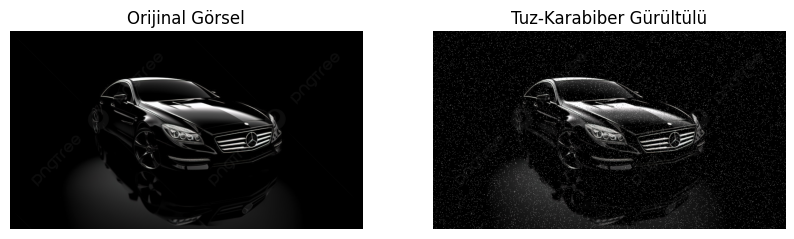

In [8]:
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

# Görüntüyü oku
image = cv2.imread('/content/resim4.jpg')

# BGR'den RGB'ye çevir (Matplotlib ile düzgün görüntülemek için)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tuz-karabiber gürültüsü fonksiyonu
def salt_pepper_noise(img, salt_prob, pepper_prob):
    noisy = np.copy(img)
    total_pixels = img.shape[0] * img.shape[1]

    # Tuz (beyaz) piksel ekle
    num_salt = int(salt_prob * total_pixels)
    for _ in range(num_salt):
        x = random.randint(0, img.shape[1] - 1)
        y = random.randint(0, img.shape[0] - 1)
        noisy[y, x] = [255, 255, 255]

    # Karabiber (siyah) piksel ekle
    num_pepper = int(pepper_prob * total_pixels)
    for _ in range(num_pepper):
        x = random.randint(0, img.shape[1] - 1)
        y = random.randint(0, img.shape[0] - 1)
        noisy[y, x] = [0, 0, 0]

    return noisy

# Gürültü uygula
noisy_img = salt_pepper_noise(image_rgb, 0.02, 0.02)

# Sonucu göster
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Orijinal Görsel")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_img)
plt.title("Tuz-Karabiber Gürültülü")
plt.axis('off')

plt.show()
